In [16]:
from algorithms import KMeans
from sklearn.cluster import KMeans as sklearnKMeans
import numpy as np
import matplotlib.pyplot as plt
import time

(170, 297, 3)

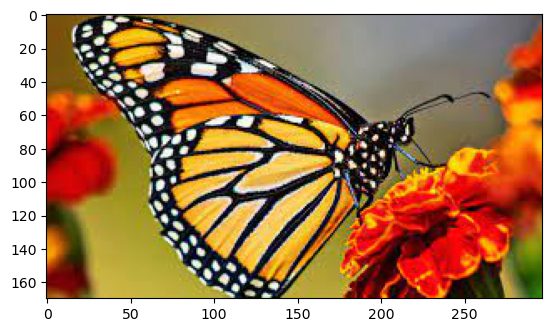

In [17]:
image = plt.imread('./but1.jpeg')
image = image / 255
plt.imshow(image)
image.shape

In [18]:
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)
pixel_values.shape

(50490, 3)

In [19]:
km = KMeans(n_clusters=3)
tic = time.time()
y = km.fit_predict(pixel_values)
toc = time.time()
print("Runtime {:.3f}'s".format(toc - tic))

Runtime 1.511's


In [20]:
centers = km.cluster_centers_
centers

array([[0.20573054, 0.12425966, 0.0849015 ],
       [0.6871377 , 0.6273936 , 0.40080765],
       [0.8313891 , 0.2870248 , 0.04849149]], dtype=float32)

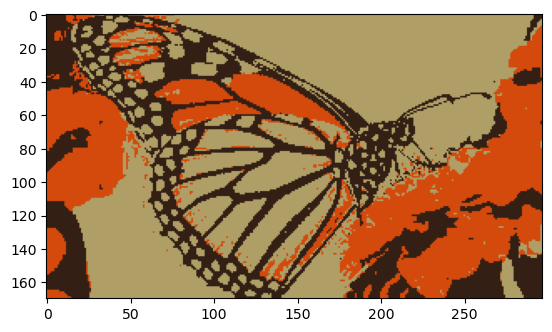

In [21]:
labels = y
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)

In [22]:
kmm = sklearnKMeans(n_clusters=10, init='k-means++')
tic = time.time()
labels_ = kmm.fit_predict(pixel_values)
toc = time.time()
print("Runtime {:.3f}'s".format(toc - tic))

Runtime 0.142's


In [23]:
centers_ = kmm.cluster_centers_
centers_

array([[0.9543074 , 0.77397686, 0.33568552],
       [0.44230115, 0.3669708 , 0.16260014],
       [0.44733316, 0.07453966, 0.02690576],
       [0.5458712 , 0.53256845, 0.47980022],
       [0.837535  , 0.07766578, 0.04315881],
       [0.90982795, 0.37899724, 0.04894896],
       [0.08980519, 0.07335171, 0.07977429],
       [0.8953043 , 0.8863993 , 0.8333363 ],
       [0.9639534 , 0.67684627, 0.07614872],
       [0.68334347, 0.6113419 , 0.19906391]], dtype=float32)

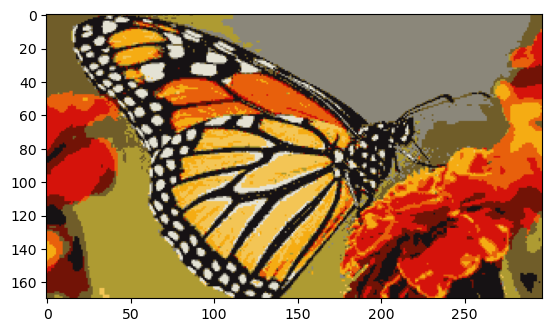

In [24]:
segmented_image1 = centers_[labels_]
segmented_image1 = segmented_image1.reshape(image.shape)
plt.imshow(segmented_image1)

Text(0.5, 1.0, 'my code')

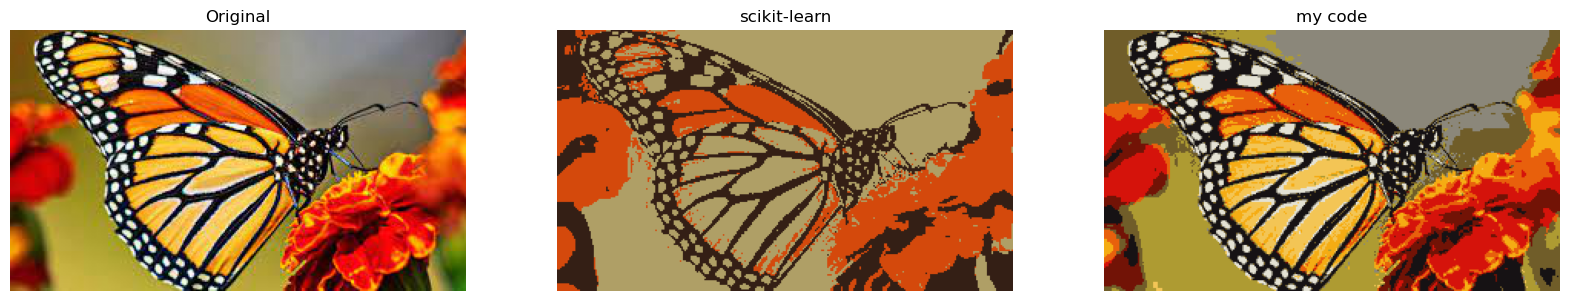

In [25]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,3,1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")
fig.add_subplot(1,3,2)
plt.imshow(segmented_image)
plt.axis('off')
plt.title("scikit-learn")
fig.add_subplot(1,3,3)
plt.imshow(segmented_image1)
plt.axis('off')
plt.title("my code")

# KMeans Implementation and Benchmarking against that of scikit-learn library

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SklearnKMeans
import timeit

Custom KMeans time: 0.1709 seconds
Sklearn KMeans time: 0.1423 seconds


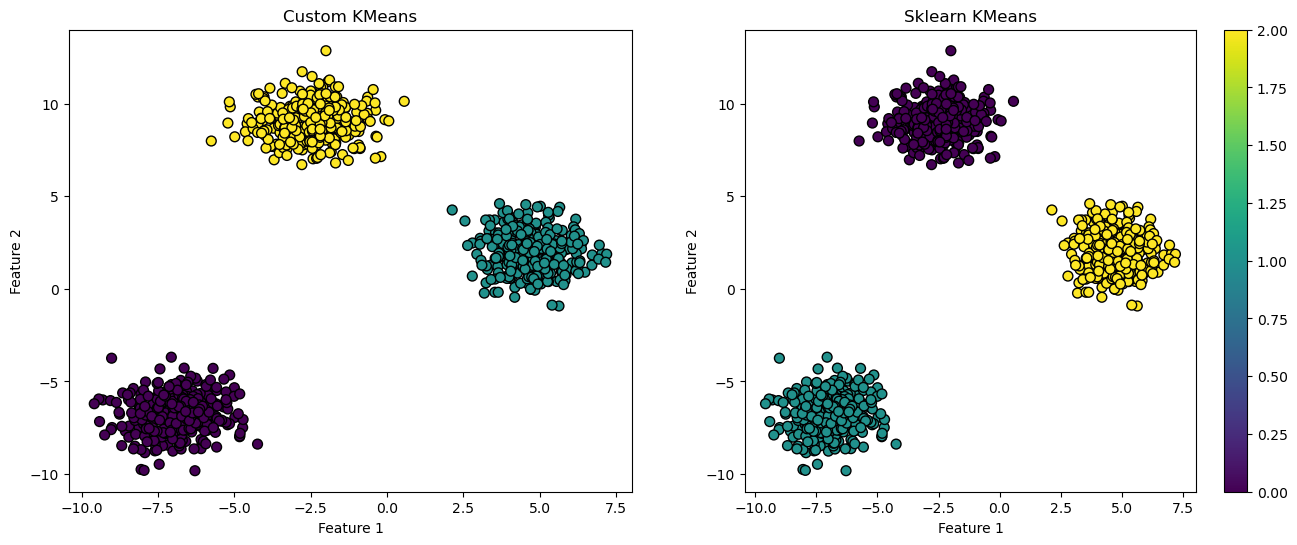

In [27]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

# Initialize and fit custom KMeans
custom_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)

# Initialize and fit sklearn KMeans
sklearn_kmeans = SklearnKMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)

# Timing the custom KMeans
custom_time = timeit.timeit(lambda: custom_kmeans.fit_predict(X), number=10)
print(f"Custom KMeans time: {custom_time:.4f} seconds")

# Timing the sklearn KMeans
sklearn_time = timeit.timeit(lambda: sklearn_kmeans.fit_predict(X), number=10)
print(f"Sklearn KMeans time: {sklearn_time:.4f} seconds")

# Plotting the results
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=custom_kmeans.cluster_labels_, cmap='viridis', s=50, edgecolor='k')
plt.title('Custom KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_kmeans.labels_, cmap='viridis', s=50, edgecolor='k')
plt.title('Sklearn KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.colorbar()
plt.show()

# DBSCAN Implementation and Benchmarking against that of scikit-learn library

In [28]:
import numpy as np
import timeit
from algorithms import  DBSCAN
from sklearn.cluster import DBSCAN as SklearnDBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

Custom DBSCAN with BallTree time: 0.4520 seconds
Custom DBSCAN with KDTree time: 0.4946 seconds
Sklearn DBSCAN time: 0.0372 seconds


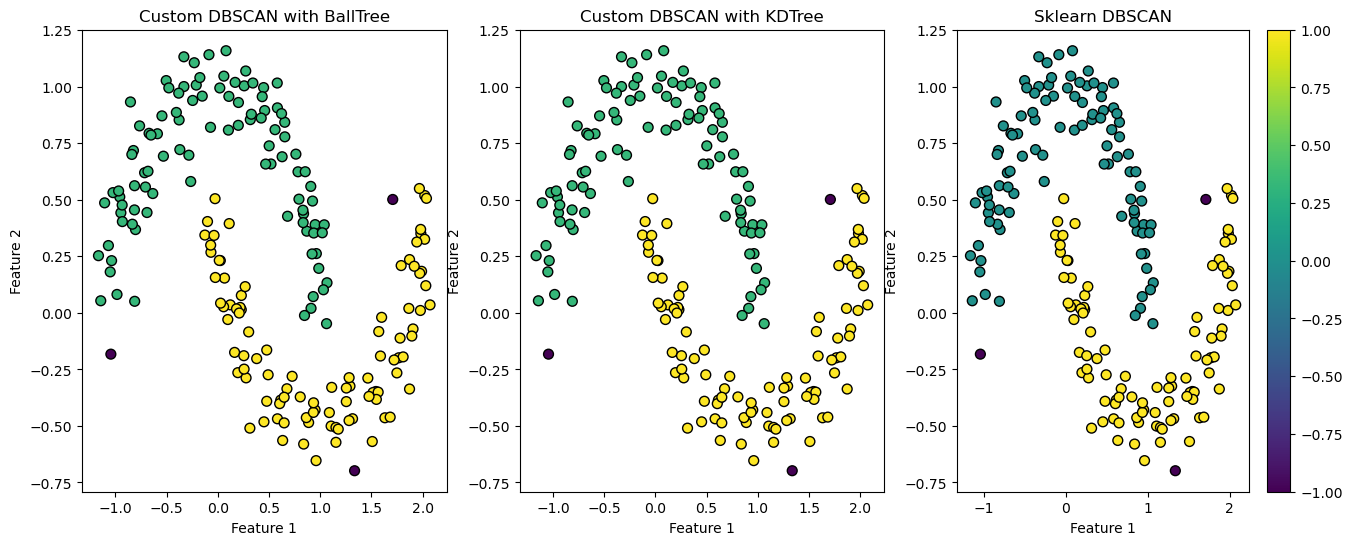

In [29]:
# Generate synthetic data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=0)

# Initialize and fit DBSCAN with BallTree
dbscan_balltree = DBSCAN(eps=0.2, min_samples=5, use_kdtree=False, plot_steps=False)
labels_balltree = dbscan_balltree.fit_predict(X)

# Initialize and fit DBSCAN with KDTree
dbscan_kdtree = DBSCAN(eps=0.2, min_samples=5, use_kdtree=True, plot_steps=False)
labels_kdtree = dbscan_kdtree.fit_predict(X)

# Initialize and fit DBSCAN from sklearn
dbscan_sklearn = SklearnDBSCAN(eps=0.2, min_samples=5)
labels_sklearn = dbscan_sklearn.fit_predict(X)

# Timing the custom DBSCAN with BallTree
balltree_time = timeit.timeit(lambda: dbscan_balltree.fit_predict(X), number=10)
print(f"Custom DBSCAN with BallTree time: {balltree_time:.4f} seconds")

# Timing the custom DBSCAN with KDTree
kdtree_time = timeit.timeit(lambda: dbscan_kdtree.fit_predict(X), number=10)
print(f"Custom DBSCAN with KDTree time: {kdtree_time:.4f} seconds")

# Timing the sklearn DBSCAN
sklearn_time = timeit.timeit(lambda: dbscan_sklearn.fit_predict(X), number=10)
print(f"Sklearn DBSCAN time: {sklearn_time:.4f} seconds")

# Plotting the results
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_balltree, cmap='viridis', s=50, edgecolor='k')
plt.title('Custom DBSCAN with BallTree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_kdtree, cmap='viridis', s=50, edgecolor='k')
plt.title('Custom DBSCAN with KDTree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis', s=50, edgecolor='k')
plt.title('Sklearn DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.colorbar()
plt.show()